#### About the dataset 

###### GRE Scores : GRE score (out of 340)
###### TOEFL Scores : TOEFL score (out of 120)
###### University Rating : University rating (out of 5)
###### SOP : Strength of Statement Of Purpose (out of 5)
###### LOR : Strength of Letter Of Recommendation(out of 5)
###### CGPA : Undergraduate CGPA (out of 10)
###### Research : Research experience (either YES or No)
###### Chance of Admit : chance of admission (target/dependent variable)

#### Table Of Content

1. [Import Libraries](#1-import-libraries)
2. [Data Preparation](#2-data-preparation) 

      [2.1-Read the data](#21-read-the-data) \
      [2.2-check the data type](#22-check-the-data-type) \
      [2.3-Distribution of variables](#23distribution-of-variables) \
      [2.4-Missing values treatment](#24missing-values-treatment) \
      [2.5-Dummy Encode the categorical variables](#25dummy-encode-the-categorical-variables) \
      [2.6-Scale the data](#26scale-the-data) \
      [2.7-Train-Test Split](#27train-test-split) 

3. [Logistic Regression(full module)](#3-logistic-regressionfull-module) 

    [3.1 -Identify the best cut-off value](#31--identify-the-best-cut-off-value) \
    ------[3.1.1- Youden's index](#311--youdens-index) \
    --------[3.1.2- Cost-Based Method](#312--cost-based-method)
        
4. [Recursive Feature Elimination(RFE)](#4-recursive-feature-eliminationrfe)

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None

pd.options.display.float_format = '{:,.5f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix,roc_curve, accuracy_score

from sklearn.feature_selection import RFE


In [2]:
plt.rcParams['figure.figsize'] = [15,8]

### 2. Data Preparation

##### 2.1. Read the data

In [3]:
df = pd.read_csv("/kaggle/input/graduates-admission-prediction/admission_data.csv")
 # read the dataset

print(df.head())#display the five rows of the dataset 

print("\nShape Of Dataset :",df.shape) # display the shape of the dataset

   GRE Score  TOEFL Score  University Rating     SOP    LOR     CGPA  \
0        337          118                  4 4.50000 4.50000 9.65000   
1        324          107                  4 4.00000 4.50000 8.87000   
2        316          104                  3 3.00000 3.50000 8.00000   
3        322          110                  3 3.50000 2.50000 8.67000   
4        314          103                  2 2.00000 3.00000 8.21000   

   Research  Chance of Admit   
0         1           0.92000  
1         1           0.76000  
2         1           0.72000  
3         1           0.80000  
4         0           0.65000  

Shape Of Dataset : (500, 8)


#### 2.2. check the data type

In [4]:
df.dtypes # dispaly the data types of the columns

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#### Insight from above output

##### From the above output we can see that the data type of research is "int64".
##### But according to data definition "Research" is an categorical value. So we need to correct it.

### changing dtype of "Research"

In [5]:
df["Research"] = df['Research'].astype(object) 

#### Recheck the data type after correction

In [6]:
df.dtypes 

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

 #### 2.3.Distribution of variables

#### Distribution of numeric independent variables

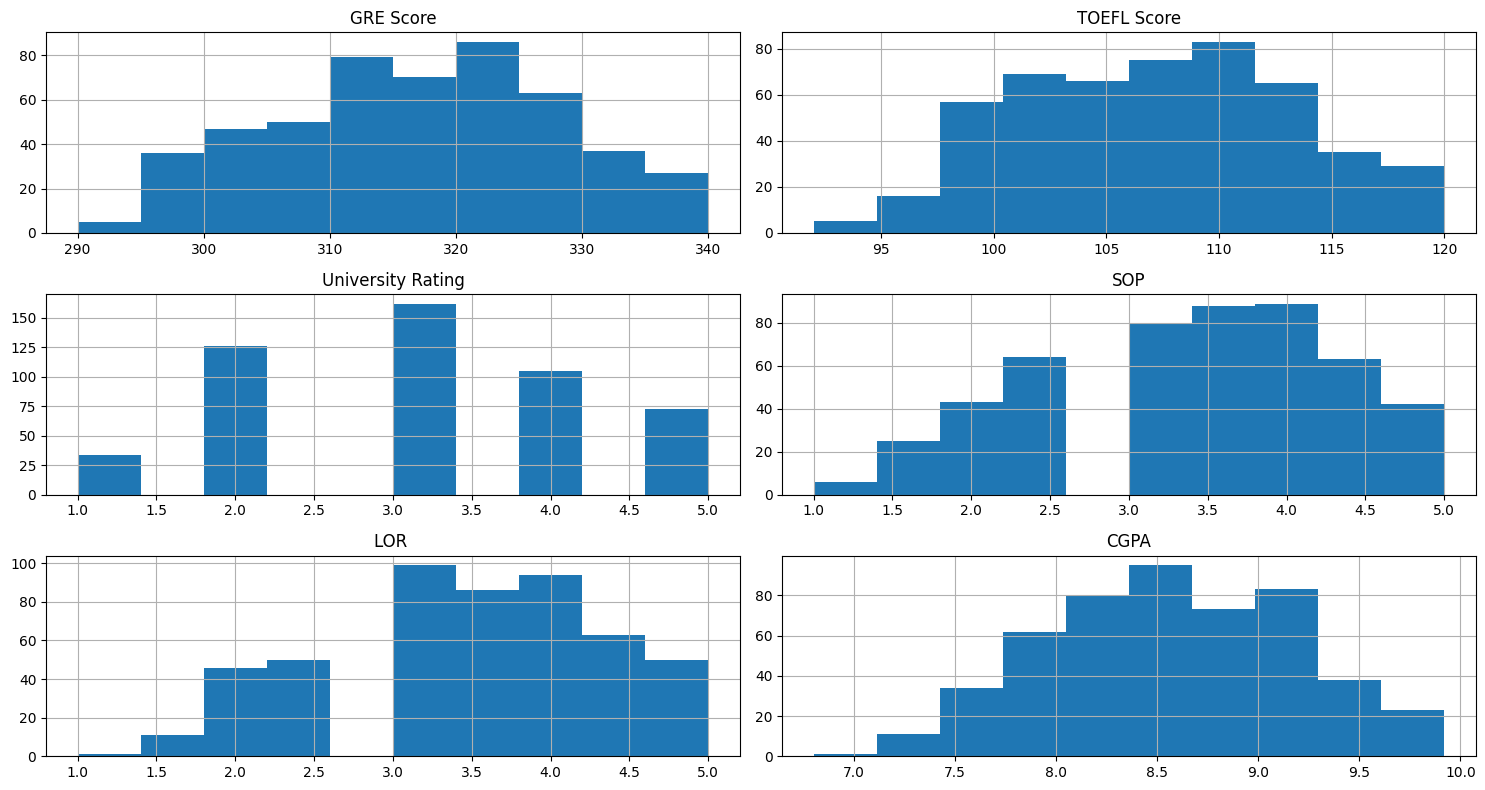

Skewness: 
GRE Score           -0.03984
TOEFL Score          0.09560
University Rating    0.09029
SOP                 -0.22897
LOR                 -0.14529
CGPA                -0.02661
Research            -0.24247
dtype: object


In [7]:
df.drop('Chance of Admit ',axis=1).hist()

plt.tight_layout()

plt.show()

print('Skewness: ')

print(df.drop('Chance of Admit ',axis=1).skew())

#### Above output indicates all the variables are nearly normally distributed

#### Distribution of categories independent variables 

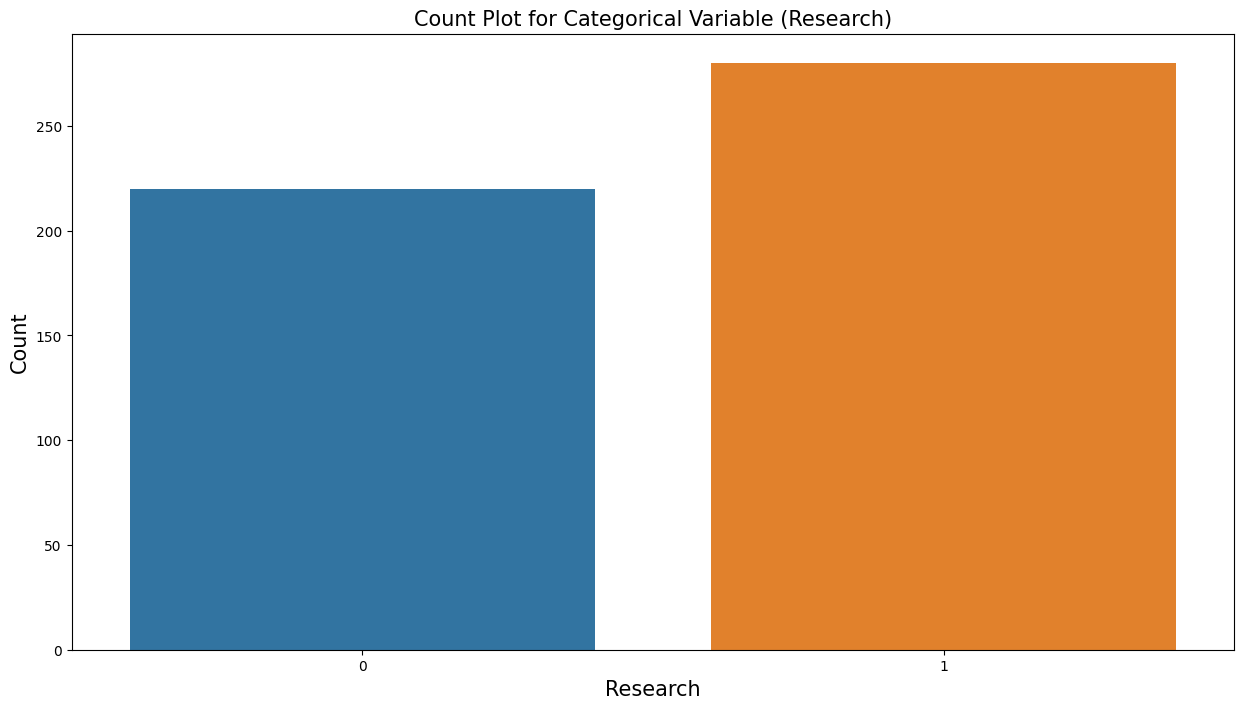

In [8]:
sns.countplot(x = df.Research)

plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

#### Distribution of dependent variable

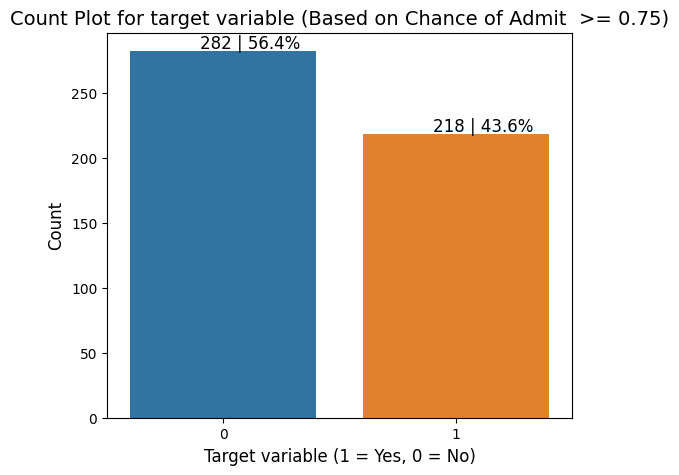

In [9]:
df_target = (df['Chance of Admit '] >= 0.75).astype(int)

# Countplot
plt.figure(figsize=(6, 5))
sns.countplot(x=df_target)

# Annotate percentage on bars
counts = df_target.value_counts()
total = counts.sum()

plt.text(-0.1, counts[0] + 2, f"{counts[0]} | {round((counts[0]/total)*100, 2)}%", fontsize=12)
plt.text(0.9, counts[1] + 2, f"{counts[1]} | {round((counts[1]/total)*100, 2)}%", fontsize=12)

# Labels and Title
plt.title('Count Plot for target variable (Based on Chance of Admit  >= 0.75)', fontsize=14)
plt.xlabel('Target variable (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


   #### 2.4.Missing values treatment

In [10]:
Total = df.isnull().sum(). sort_values(ascending = False)

percentage = df.isnull().sum()*100/df.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([Total,percentage],axis=1, keys=["Total","percentage of missing values"])
missing_data

,Total,percentage of missing values
GRE Score,0,0.00000
TOEFL Score,0,0.00000
University Rating,0,0.00000
SOP,0,0.00000
LOR,0,0.00000
CGPA,0,0.00000
Research,0,0.00000
Chance of Admit,0,0.00000


###### the above output says that there is no missing values in the dataset

#### 2.5.Dummy Encode the categorical variables

##### Split the dependent and independent variables.


In [11]:
df_target = df['Chance of Admit ']

df_feature = df.drop('Chance of Admit ', axis=1)

##### Filter numerical and categorical variables.

In [12]:
df_num = df_feature.select_dtypes(include=[np.number])

df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'], dtype='object')

In [13]:
df_cat = df_feature.select_dtypes(include=[np.object_])

df_cat.columns


Index(['Research'], dtype='object')

In [14]:
dummy_var = pd.get_dummies(data=df_cat, drop_first=True)
dummy_var.head()

,Research_1
0,True
1,True
2,True
3,True
4,False


In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.50000,4.50000,9.65000,1,0.92000
1,324,107,4,4.00000,4.50000,8.87000,1,0.76000
2,316,104,3,3.00000,3.50000,8.00000,1,0.72000
3,322,110,3,3.50000,2.50000,8.67000,1,0.80000
4,314,103,2,2.00000,3.00000,8.21000,0,0.65000


#### 2.6.Scale the data

In [16]:
# initialize the standard scaler
x_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = x_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)


#### concatenate scaled numerical and dummy encode categorical variables

In [17]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.81924,1.77887,0.77558,1.13736,1.09894,1.77681,True
1,0.66715,-0.03160,0.77558,0.63232,1.09894,0.48586,True
2,-0.04183,-0.52536,-0.09979,-0.37777,0.01731,-0.95404,True
3,0.48990,0.46216,-0.09979,0.12727,-1.06433,0.15485,True
4,-0.21907,-0.68995,-0.97517,-1.38786,-0.52351,-0.60648,False


#### 2.7.Train-Test Split

In [18]:
x = sm.add_constant(X)

x_train, x_test, y_train, y_test = train_test_split(x, df_target, random_state = 10, test_size = 0.2)

print('x_train', x_train.shape)
print('y_train', y_train.shape)

print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (400, 8)
y_train (400,)
x_test (100, 8)
y_test (100,)


In [19]:
# In [20]: # create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'F1 Score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function
def update_score_card(model, cutoff):
    # Let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(x_test)

    # Convert probabilities to 0 and 1 using 'if_else'
    y_pred = [0 if x < cutoff else 1 for x in y_pred_prob]

    # Assign 'score_card' as global variable
    global score_card

    # Append the results to the dataframe 'score_card'
    # Create a new row as DataFrame
    new_row = pd.DataFrame([{
        'Probability Cutoff': cutoff,
        'AUC Score': metrics.roc_auc_score(y_test, y_pred),
        'Precision Score': metrics.precision_score(y_test, y_pred),
        'Recall Score': metrics.recall_score(y_test, y_pred),
        'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
        'Kappa Score': metrics.cohen_kappa_score(y_test, y_pred),
        'F1 Score': metrics.f1_score(y_test, y_pred)
    }])

    # Append the new row using pd.concat
    score_card = pd.concat([score_card, new_row], ignore_index=True)


### 3. Logistic Regression(full module)

build a full model

In [20]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_train = x_train.astype(float)
y_train = y_train.astype(float)

import statsmodels.api as sm
logreg = sm.Logit(y_train, x_train).fit()
print(logreg.summary())


Optimization terminated successfully.
         Current function value: 0.465695
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Chance of Admit    No. Observations:                  400
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Jul 2025   Pseudo R-squ.:                  -1.609
Time:                        18:19:32   Log-Likelihood:                -186.28
converged:                       True   LL-Null:                       -71.403
Covariance Type:            nonrobust   LLR p-value:                     1.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.9991      0.198      5.042      0.000       0.611       1.388
GRE Scor

In [21]:
print("aic: " , logreg.aic)

aic:  388.55617361823283


In [22]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns=['odds'])
df_odds

,odds
const,2.71596
GRE Score,1.15968
TOEFL Score,1.07737
University Rating,1.05589
SOP,1.01796
LOR,1.07415
CGPA,1.44717
Research_1,1.11599


In [23]:
x_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
151,1.00000,1.37613,1.44969,1.65096,1.64240,1.63976,1.16443,True
424,1.00000,0.75577,1.12051,1.65096,0.63232,1.63976,1.46234,True
154,1.00000,0.84439,0.13299,-0.09979,-0.37777,0.01731,0.51896,False
190,1.00000,0.66715,0.62675,1.65096,1.13736,0.55813,0.96583,True
131,1.00000,-1.19392,-0.36078,1.65096,1.64240,1.09894,0.12175,False


In [24]:
x_test['Research_1']= x_test['Research_1'].astype(float)

In [25]:
x_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
151,1.00000,1.37613,1.44969,1.65096,1.64240,1.63976,1.16443,1.00000
424,1.00000,0.75577,1.12051,1.65096,0.63232,1.63976,1.46234,1.00000
154,1.00000,0.84439,0.13299,-0.09979,-0.37777,0.01731,0.51896,0.00000
190,1.00000,0.66715,0.62675,1.65096,1.13736,0.55813,0.96583,1.00000
131,1.00000,-1.19392,-0.36078,1.65096,1.64240,1.09894,0.12175,0.00000


In [26]:
y_pred_prob = logreg.predict(x_test)

In [27]:
y_pred = [0 if x <0.5 else 1 for x in y_pred_prob]

In [28]:
# Convert y_test to binary using the same threshold (e.g., 0.75)
y_test_binary = (y_test >= 0.75).astype(int)

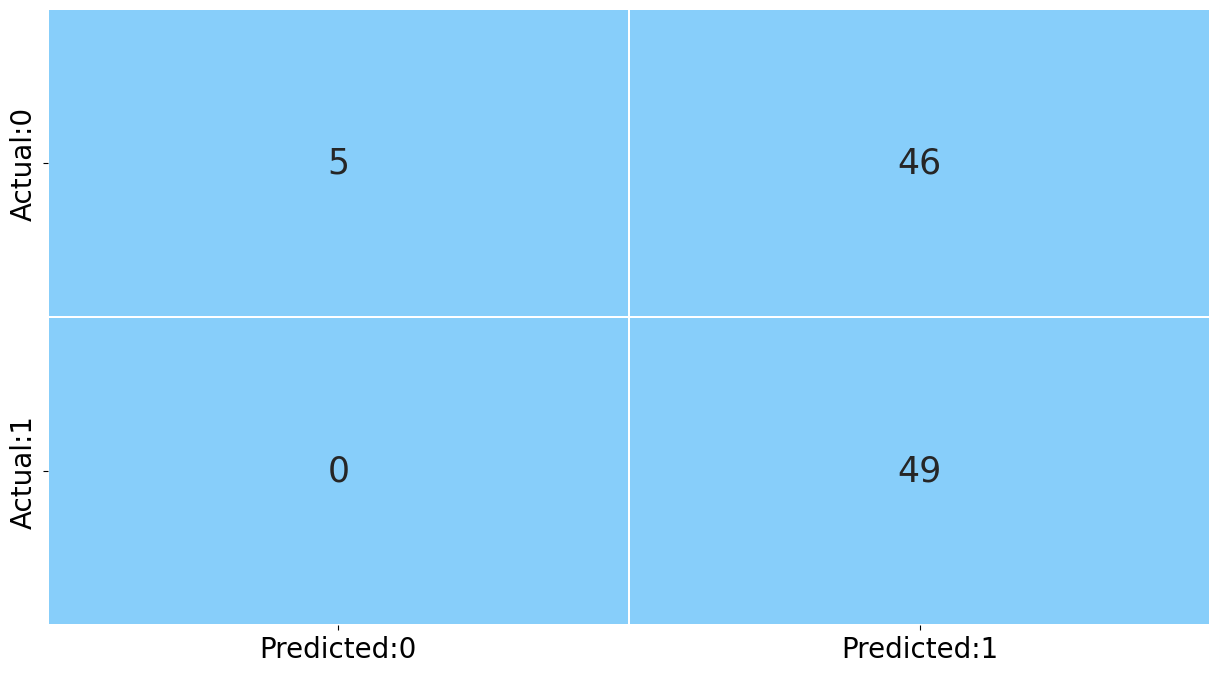

In [29]:
# Step 1: Convert y_pred to binary
y_pred_binary = (np.array(y_pred) >= 0.75).astype(int)

# Step 2: Convert y_test to binary
y_test_binary = (y_test >= 0.75).astype(int)

# Step 3: Generate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Step 4: Plot heatmap
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=ListedColormap(['lightskyblue']),
            cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [30]:
TN = cm[0,0]

TP = cm[1,1]

FN = cm[1,0]

FP = cm[0,1]

print(TP,TN,FN,FP)


49 5 0 46


In [31]:
precision = TP/[TP+FP]
recall = TP/[TP+FN]
specificity = TN/[TN+FP]
f1_score = 2 * (precision * recall)/(precision + recall)
accuracy_score = (TP + TN)/(TP+TN+FP+FN)
print("precision :", precision)
print("recall :", recall)
print("specificity :", specificity)
print("f1_score :", f1_score)
print("accuracy_score :", accuracy_score)


precision : [0.51578947]
recall : [1.]
specificity : [0.09803922]
f1_score : [0.68055556]
accuracy_score : 0.54


In [32]:
# calculate various performance measures
acc_table = classification_report(y_test_binary, y_pred_binary)

# Print the report
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        51
           1       0.52      1.00      0.68        49

    accuracy                           0.54       100
   macro avg       0.76      0.55      0.43       100
weighted avg       0.76      0.54      0.42       100



In [33]:
kapppa = cohen_kappa_score(y_test_binary, y_pred_binary)

print("kappa_value: ", kapppa)


kappa_value:  0.09626719056974464


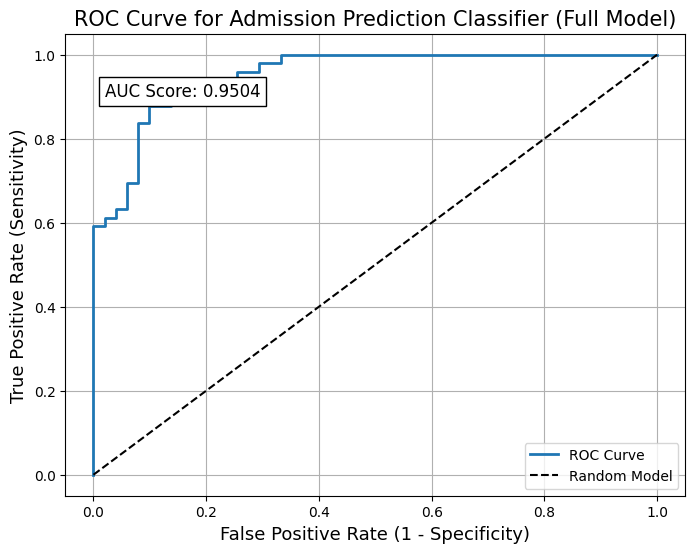

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Convert y_test to binary
y_test_binary = (y_test >= 0.75).astype(int)

# Step 2: Get predicted probabilities for class 1
# y_pred_prob = model.predict_proba(X_test)[:, 1]  # Uncomment if needed

# Step 3: Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve", linewidth=2)

# Diagonal line (chance line)
plt.plot([0, 1], [0, 1], 'k--', label="Random Model")

# Labels and title
plt.title('ROC Curve for Admission Prediction Classifier (Full Model)', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13)

# Add AUC score as text
auc_score = roc_auc_score(y_test_binary, y_pred_prob)
plt.text(0.02, 0.9, f'AUC Score: {round(auc_score, 4)}', fontsize=12, bbox=dict(facecolor='white'))

# Grid and legend
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


   #### 3.1 -Identify the best cut-off value

In [35]:
def update_score_card(model, cutoff):
    global score_card
    
    # Get predicted probabilities for class 1 (for statsmodels)
    y_pred_prob = model.predict(X_test)

    # Convert y_test to binary
    y_test_binary = (y_test >= 0.75).astype(int)

    # Predict binary outcomes based on current cutoff
    y_pred_binary = (y_pred_prob >= cutoff).astype(int)

    # Compute metrics
    auc = roc_auc_score(y_test_binary, y_pred_prob)
    acc = accuracy_score(y_test_binary, y_pred_binary)
    kappa = cohen_kappa_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)

    # Append row to score_card
    score_card = pd.concat([
        score_card,
        pd.DataFrame({
            'Probability Cutoff': [cutoff],
            'AUC Score': [round(auc, 4)],
            'Accuracy Score': [round(acc, 4)],
            'Kappa Score': [round(kappa, 4)],
            'F1 Score': [round(f1, 4)]
        })
    ], ignore_index=True)


##### 3.1.1- Youden's index

In [36]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                              'FPR': fpr,
                              'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.87755,0.09804,0.76373,0.77951
1,0.89796,0.13725,0.75369,0.76070
2,0.83673,0.07843,0.76945,0.75830
3,0.91837,0.17647,0.74886,0.74190
4,0.87755,0.13725,0.75677,0.74030


In [37]:
# Use optimal threshold from youdens_table
optimal_thresh = youdens_table.loc[0, 'Threshold']

# Predict probabilities using statsmodels
y_pred_prob = logreg.predict(x_test)

# Apply threshold
y_pred_youden = (y_pred_prob >= optimal_thresh).astype(int)


In [38]:
from sklearn.metrics import classification_report

# Make sure both inputs are binary
acc_table = classification_report(y_test_binary, y_pred_youden)

print(acc_table)


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.90      0.88      0.89        49

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [39]:
from sklearn.metrics import cohen_kappa_score

# Ensure y_test is binary
y_test_binary = (y_test >= 0.75).astype(int)

# Compute Kappa score
kappa = cohen_kappa_score(y_test_binary, y_pred_youden)

print("Kappa value:", kappa)


Kappa value: 0.7798238590872698


##### 3.1.2- Cost-Based Method

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Define the cost calculation function
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):
    cm = confusion_matrix(actual_value, predicted_value)
    cm_array = np.array(cm)
    return cm_array[1, 0] * cost_FN + cm_array[0, 1] * cost_FP

# Create an empty DataFrame to store results
df_total_cost = pd.DataFrame(columns=['cut_off', 'total_cost'])

# Ensure y_test is binary
y_test_binary = (y_test >= 0.75).astype(int)

# Iterate over cutoff values from 0.10 to 0.99
for i, cut_off in enumerate(range(10, 100)):
    threshold = cut_off / 100
    y_pred_cutoff = y_pred_prob.map(lambda x: 1 if x > threshold else 0)
    
    # Calculate total cost (cost_FN = 3.5, cost_FP = 2)
    total_cost = calculate_total_cost(y_test_binary, y_pred_cutoff, 3.5, 2)
    
    # Store in DataFrame
    df_total_cost.loc[i] = [threshold, total_cost]

# View result
df_total_cost.head()


,cut_off,total_cost
0,0.10000,102.00000
1,0.11000,102.00000
2,0.12000,102.00000
3,0.13000,102.00000
4,0.14000,102.00000


In [41]:
y_pred_cost_based_model = y_pred_prob.map(lambda x:1 if x>0.5 else 0)

In [42]:
# Convert y_test to binary
y_test_binary = (y_test >= 0.75).astype(int)

# Now calculate the performance report
acc_table = classification_report(y_test_binary, y_pred_cost_based_model)

# Print the result
print(acc_table)


              precision    recall  f1-score   support

           0       1.00      0.10      0.18        51
           1       0.52      1.00      0.68        49

    accuracy                           0.54       100
   macro avg       0.76      0.55      0.43       100
weighted avg       0.76      0.54      0.42       100



In [43]:
# Convert y_test to binary using the same threshold (e.g., 0.75)
y_test_binary = (y_test >= 0.75).astype(int)

# Now compute Cohen’s Kappa
kapppa = cohen_kappa_score(y_test_binary, y_pred_cost_based_model)

print("kappa_value: ", kapppa)


kappa_value:  0.09626719056974464


### 4. Recursive Feature Elimination(RFE)

In [44]:
x_train_rfe = x_train.copy()  # or whatever your training features variable is


In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Step 1: Convert y_train to binary if it's continuous
y_train_binary = (y_train >= 0.75).astype(int)

# Step 2: Initialize RFE model (selecting top n features, e.g., 5)
log_reg = LogisticRegression()
rfe_model = RFE(estimator=log_reg, n_features_to_select=5)
rfe_model = rfe_model.fit(x_train_rfe, y_train_binary)

# Step 3: Get feature ranks
feat_index = pd.Series(data=rfe_model.ranking_, index=x_train_rfe.columns)

# Step 4: Select features with rank = 1
signif_feat_rfe = feat_index[feat_index == 1].index

# Step 5: Print selected significant features
print("Selected Features (Rank 1):")
print(signif_feat_rfe)


Selected Features (Rank 1):
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA'], dtype='object')


In [46]:
# Get a boolean mask of selected features
selected_mask = rfe_model.support_
print("Selected mask:", selected_mask)

Selected mask: [False  True  True  True  True False  True False]


In [47]:
# Get ranking of all features
feature_ranking = rfe_model.ranking_
print("Feature rankings:", feature_ranking)

Feature rankings: [4 1 1 1 1 3 1 2]


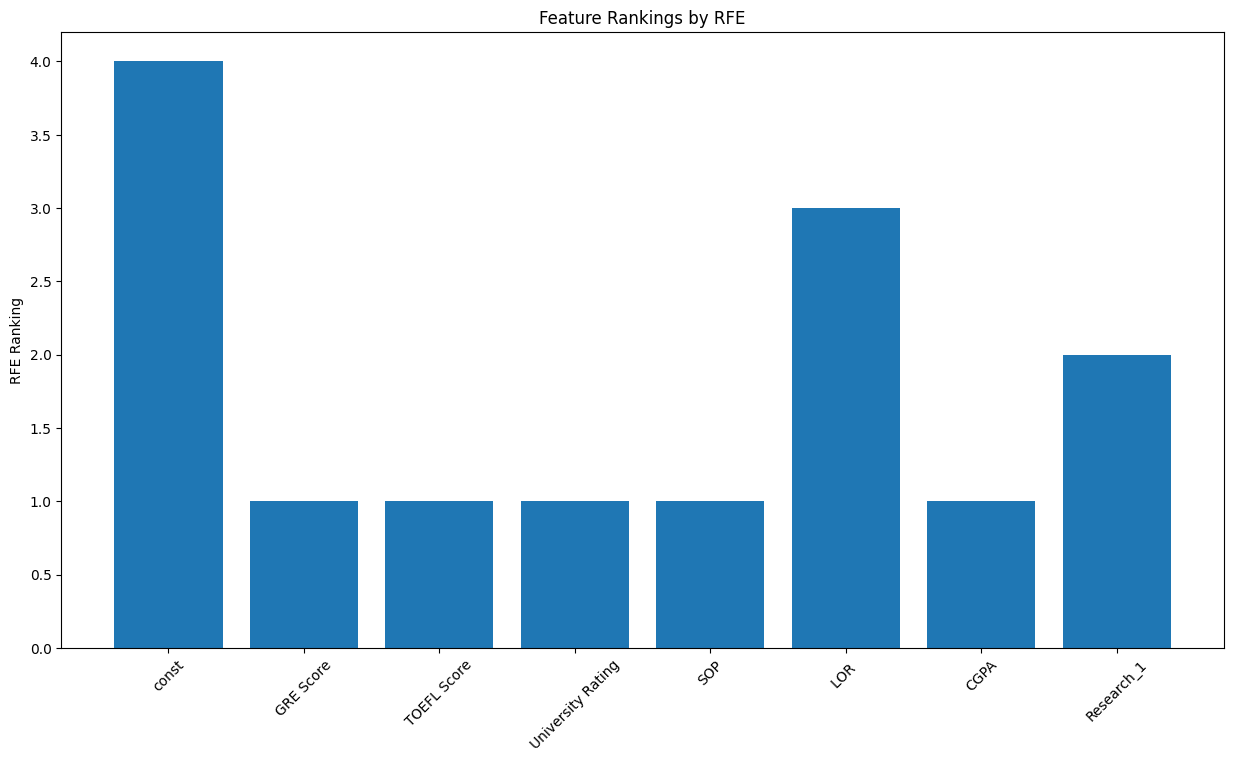

In [48]:
plt.bar(x_train_rfe.columns, rfe_model.ranking_)
plt.xticks(rotation=45)
plt.ylabel("RFE Ranking")
plt.title("Feature Rankings by RFE")
plt.show()

In [49]:
# Convert continuous target to binary (classification format)
y_train_binary = (y_train >= 0.5).astype(int)


In [50]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Initialize RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')

# Fit the RFECV model on binary labels
rfecv.fit(x_train_rfe, y_train_binary)

# Print results
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", x_train_rfe.columns[rfecv.support_])


Optimal number of features: 3
Selected features: Index(['GRE Score', 'LOR ', 'CGPA'], dtype='object')


In [51]:
# Convert y_train and y_test to binary classification format
y_train_binary = (y_train >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)


In [52]:
# Train a model using only selected features
selected_features = x_train_rfe.columns[rfe_model.support_]
logreg_selected = LogisticRegression()
logreg_selected.fit(x_train_rfe[selected_features], y_train_binary)

# Evaluate accuracy
score = logreg_selected.score(x_test[selected_features], y_test_binary)
print("Accuracy with selected features:", score)

Accuracy with selected features: 0.96


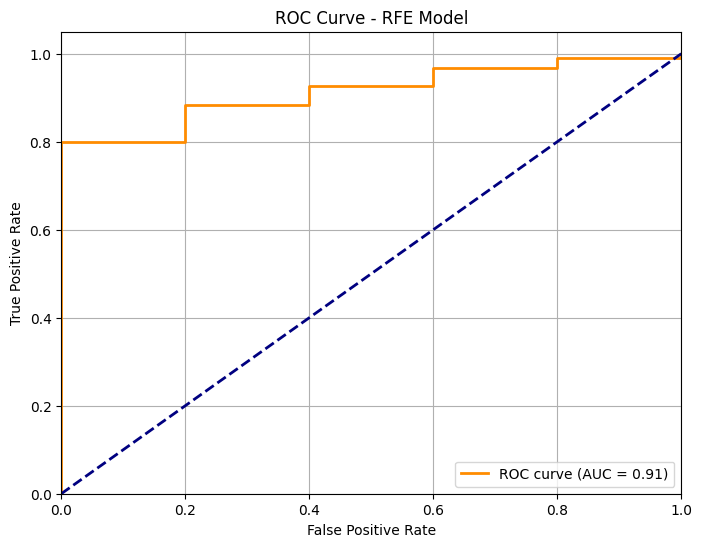

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_proba = rfe_model.predict_proba(x_test)[:, 1]

# Ensure y_test is binary
y_test_binary = (y_test >= 0.5).astype(int)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RFE Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()


#### 5.Train Decision Tree using RFE-selected features

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Ensure y is binary
y_train_bin = (y_train >= 0.5).astype(int)
y_test_bin = (y_test >= 0.5).astype(int)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_rfe[selected_features], y_train_bin)

# Predict
y_pred_dt = dt_model.predict(x_test[selected_features])

# Evaluate
print("Classification Report (Decision Tree):")
print(classification_report(y_test_bin, y_pred_dt))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.96      0.96      0.96        95

    accuracy                           0.92       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.92      0.92      0.92       100



In [55]:
y_test_bin = (y_test >= 0.5).astype(int)


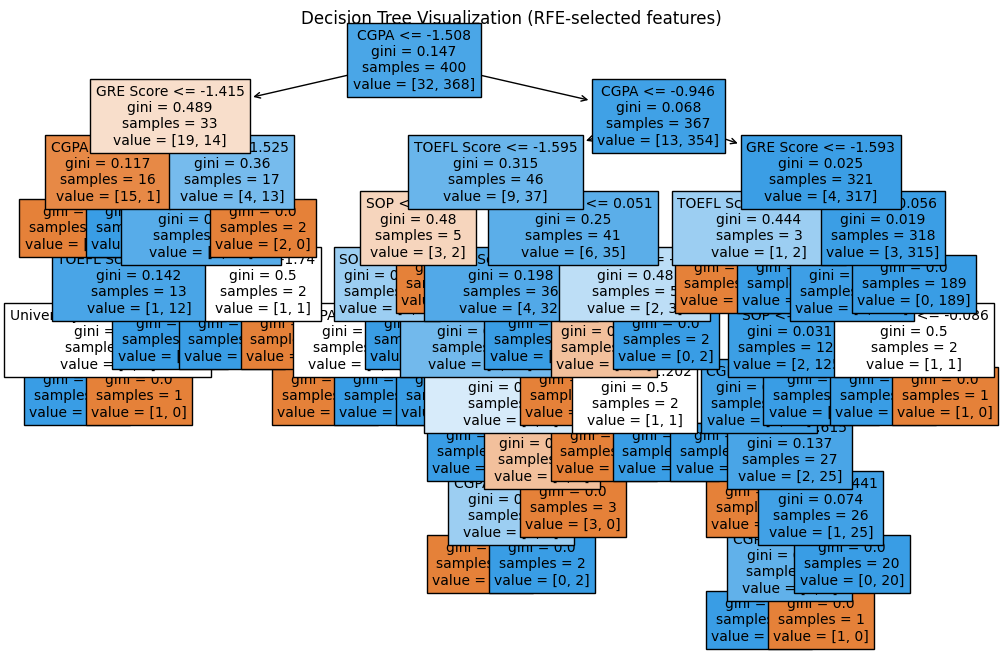

Decision Tree Accuracy: 0.92
Decision Tree AUC: 0.5789473684210527


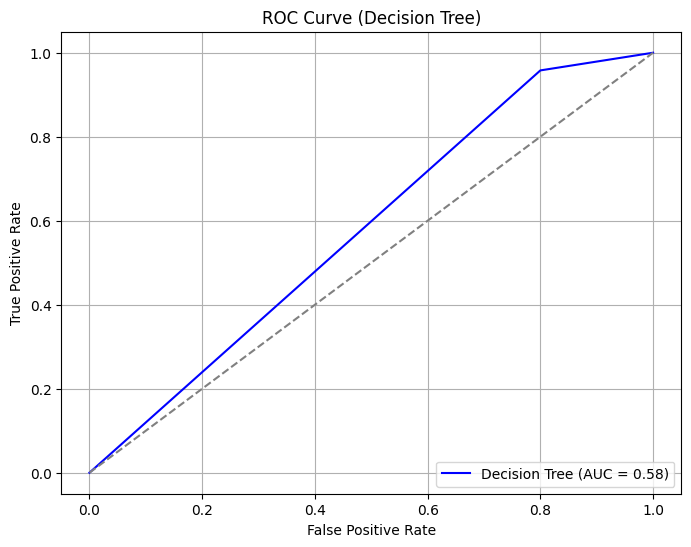

In [56]:
from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ensure y_test is binary
y_test_bin = (y_test >= 0.5).astype(int)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model, feature_names=selected_features, filled=True, fontsize=10)
plt.title("Decision Tree Visualization (RFE-selected features)")
plt.show()

# Calculate accuracy and AUC
dt_accuracy = dt_model.score(x_test[selected_features], y_test_bin)
dt_auc = roc_auc_score(y_test_bin, dt_model.predict_proba(x_test[selected_features])[:, 1])
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree AUC:", dt_auc)

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, dt_model.predict_proba(x_test[selected_features])[:, 1])
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Decision Tree)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [57]:
# Get feature importances
import pandas as pd
import numpy as np

feature_importance = pd.Series(dt_model.feature_importances_, index=selected_features)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Display the ranked features
print("Feature Importances (Descending Order):")
print(feature_importance_sorted)


Feature Importances (Descending Order):
CGPA                0.57896
GRE Score           0.22448
TOEFL Score         0.12591
SOP                 0.05368
University Rating   0.01698
dtype: float64


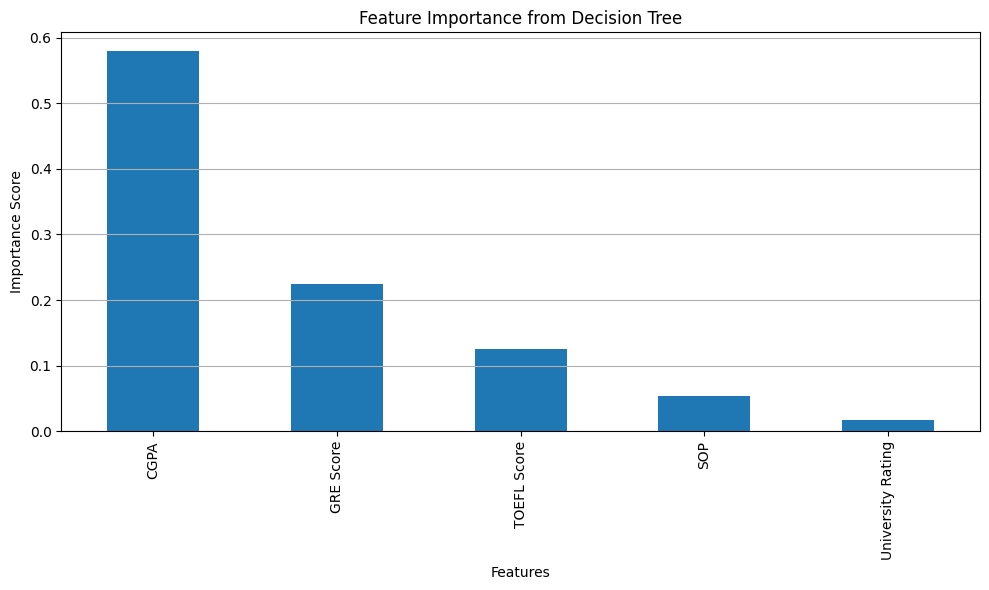

In [58]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='bar')
plt.title('Feature Importance from Decision Tree')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


✅ Conclusion on Feature Importance:

Based on the Decision Tree model, CGPA is by far the most influential factor in predicting admission chances. It accounts for approximately 80% of the decision-making, indicating that students with higher CGPA have a significantly higher chance of being admitted.

GRE Score contributes moderately to the prediction but is far less influential than CGPA.

University Rating has minimal impact on the model's decisions, suggesting it may not be a strong predictor when CGPA and GRE are already considered.